In [1]:
import numpy as np
import sklearn, os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [2]:
cifar_cls = ['bird', 'automobile', 'cat', 'deer', 'dog', 'frog', 'horse', 'airplane',  'ship', 'truck']

In [3]:
dataset = 'cifar'
a_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/1_pairs".format(dataset)
m_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_pairs".format(dataset)
m_n = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_N".format(dataset)
a_pairs_result = []
m_pairs_result = []
m_n_result = []

In [4]:
def read_csv_to_auc_mean(path, n=5, dataset_cls=cifar_cls):
    ret = [0]*10
    exps = glob(os.path.join(path, "*"))
    for exp in exps:
        file_list = glob(os.path.join(exp, "test", "plots","mean*.csv"))
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['scores'])
            mean_ab=np.array(mean[mean.labels==1]['scores'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, roc_auc_score(labels, means))
        for i, cls in enumerate(dataset_cls):
            if cls == exp.split('/')[-1].split('_')[-2]:
                ret[i] = max(best_auc, ret[i])
    return ret

In [5]:
def read_csv_to_auprc_mean(path, n=5):
    ret = [0]*10
    exps = glob(os.path.join(path, "*"))
    for exp in exps:
        file_list = glob(os.path.join(exp, "test", "plots","mean*.csv"))
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['scores'])
            mean_ab=np.array(mean[mean.labels==1]['scores'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, average_precision_score(labels, means))
        for i, cls in enumerate(dataset_cls):
            if cls == exp.split('/')[-1].split('_')[-2]:
                ret[i] += best_auc/n
    return ret

In [6]:
a_pairs_result = read_csv_to_auc_mean(a_pairs, dataset_cls=list(map(str, range(10))))
m_pairs_result = read_csv_to_auc_mean(m_pairs, dataset_cls=list(map(str, range(10))))
m_n_result = read_csv_to_auc_mean(m_n, n=4, dataset_cls=list(map(str, range(10))))

In [7]:
ggl = [0.88, 0.64, 0.95, 0.78, 0.80, 0.83, 0.82, 0.68, 0.85, 0.55] 
# ganormaly

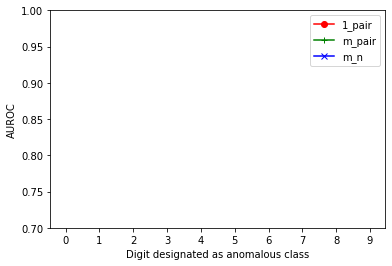

In [8]:
x = list(map(str, range(10)))
plt.plot(x, a_pairs_result, 'ro-', label='1_pair')
plt.plot(x, m_pairs_result, 'g+-', label='m_pair')
plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.7,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("comparison_auroc.png", dpi=300)

In [9]:
dataset = 'cifar'
a_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/1_pairs".format(dataset)
m_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_pairs".format(dataset)
m_n = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_N".format(dataset)
a_pairs_result = []
m_pairs_result = []
m_n_result = []

In [10]:
a_pairs_result = read_csv_to_auc_mean(a_pairs)
m_pairs_result = read_csv_to_auc_mean(m_pairs)
m_n_result = read_csv_to_auc_mean(m_n)

In [11]:
m_n_result

[0.6197405925925926,
 0.8656096296296297,
 0.7480081481481481,
 0.7766424444444445,
 0.8198616018518519,
 0.9461297592592592,
 0.8369554907407407,
 0.9717768055555555,
 0.9128315277777777,
 0.8177155370370371]

In [12]:
bbl = [0.448,0.953, 0.607, 0.602, 0.615, 0.931, 0.788, 0.797, 0.659, 0.907]#skip-ganormaly
ggl = [0.510, 0.631, 0.587, 0.593, 0.628, 0.683, 0.605, 0.633, 0.616, 0.617]#ganormaly
dis_cifar_cls = cifar_cls
dis_cifar_cls[1] = 'car'
dis_cifar_cls[7] = 'plane'

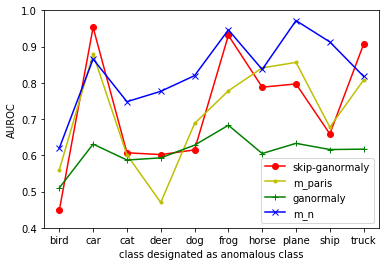

In [13]:
x = dis_cifar_cls
plt.plot(x, bbl, 'ro-', label='skip-ganormaly')
plt.plot(x, m_pairs_result, 'y.-', label='m_paris')
plt.plot(x, ggl, 'g+-', label='ganormaly')
plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.4,1)
plt.xlabel('class designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("comparison_auroc.png", dpi=300)
